# MDEO model: DM scan with neutrino masses

The idea is to do a firts DM random scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyMDEO_LesHouches_generator

import neutrino_analytic
import NEUTRINO2018

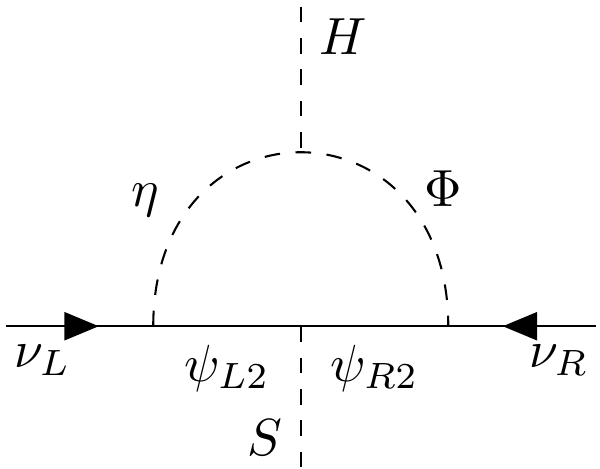

In [3]:
from IPython.display import Image
Image("/home/anferivera/Work/Documents_compartidos/MDEO/neutrino-diagram.png", width=300)

## Nemerical Analysis

In [4]:
#For good plots
plt.rcParams.update({'font.size': 12}) 
#plt.rc('font',size='18')

Read full file

In [5]:
#Read full file
xd = pd.read_csv('general-scan.csv')

xd.shape

(56126, 64)

Filter with $m {\chi_1^0} < m {s_1}$ and $\lambda_5 <= \sqrt(4\pi)$

In [6]:
xd = xd[np.logical_and(np.abs(xd.mXi_1) < np.abs(xd.mns_1), xd.Lam5 <= np.sqrt(4*np.pi) )]

xd = xd.reset_index()
del[xd['index']]

xd.shape

(10133, 64)

In [9]:
xd[['mh1','mh2']]

,mh1,mh2
0,125.1,1741.397095
1,125.1,1481.327105
2,125.1,2739.567109
3,125.1,2021.383194
4,125.1,2937.570984
...,...,...
10128,125.1,154.532294
10129,125.1,157.771754
10130,125.1,472.447145
10131,125.1,140.606405


In [16]:
kk = xd[np.logical_and(xd.mh2 > 300., xd.mh2 > xd.mChi)]

In [17]:
print(xd.shape, kk.shape)

(10133, 64) (3092, 64)


## Dark matter $\Omega h^2$

In [7]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


In [8]:
xd = xd[np.logical_and((xd.Omega1+xd.Omega2)>Omega_min,(xd.Omega1+xd.Omega2)<Omega_max)]

xd = xd.reset_index()
del[xd['index']]

#Export good DM values
#del[xDM['Unnamed: 0']]
#xDM.to_csv('good-DM-value.csv')

xd.shape

(658, 64)

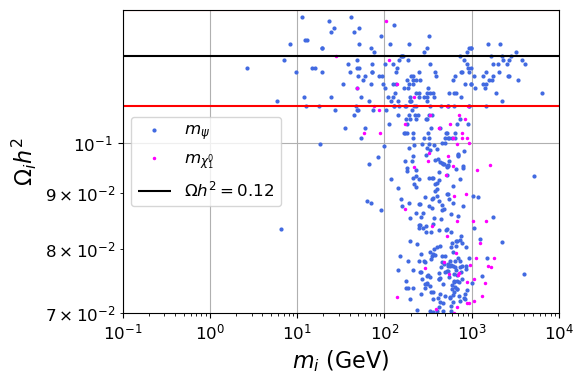

In [9]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi,xd.Omega1,color='royalblue', marker='.',ms=4,linestyle='',label='$m_\psi$')
plt.loglog(xd.mXi_1,xd.Omega2,color='magenta', marker='.',ms=3,linestyle='',label='$m_{\chi_1^0}$')

plt.hlines(Omega_max,0.1,1e4, 'r',label=r'')
plt.hlines(Omega_min,0.1,1e4, 'r',label=r'')

plt.hlines(Omega,0.1,1e4, 'k',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_i$ (GeV)',size=16)
plt.ylabel(r'$\Omega_i h^2$',size=16)
plt.legend()
plt.grid()

#plt.ylim(Omega_min,Omega_max)
plt.ylim(7e-2,Omega_max)
plt.xlim(0.1, 1e4)
#plt.savefig('plots/DM.pdf')

plt.tight_layout()

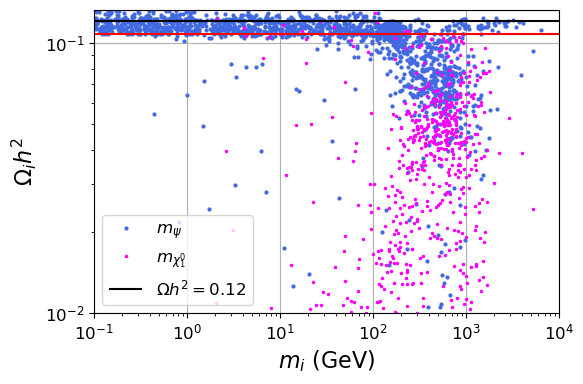

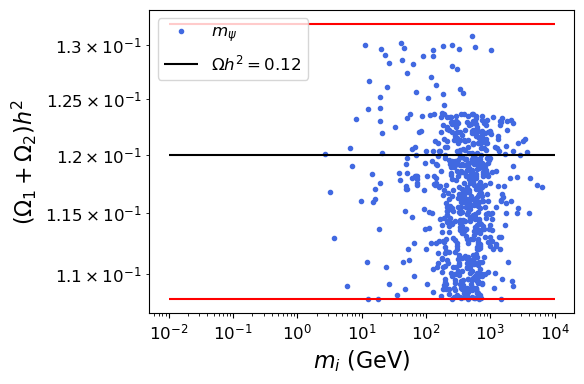

In [10]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi,(xd.Omega1+xd.Omega2),color='royalblue', marker='o',ms=3,linestyle='',label='$m_\psi$')

plt.hlines(Omega_max,0.01,1e4, 'r',label=r'')
plt.hlines(Omega_min,0.01,1e4, 'r',label=r'')

plt.hlines(Omega,0.01,1e4, 'k',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_i$ (GeV)',size=16)
plt.ylabel(r'$(\Omega_1 + \Omega_2) h^2$',size=16)
plt.legend()

#plt.ylim(Omega_min-0.002,Omega_max+0.002)
#plt.ylim(5e-3,Omega_max)
#plt.xlim(0.1, 1e4)

plt.tight_layout()

## Neutrino masess

In [14]:
mnus = neutrino_analytic.MatrixDiag_new(xd.ZL11,xd.ZL12,xd.ZL21,xd.ZL22,xd.ZR11,xd.ZR12,xd.ZR21,xd.ZR22,xd.ZN11,\
                                    xd.ZN12,xd.ZN21,xd.ZN22,xd.YnL11,xd.YnL12,xd.YnL13,xd.YnL21,xd.YnL22,\
                                    xd.YnL23,xd.YnR11,xd.YnR12,xd.YnR13,xd.YnR21,xd.YnR22,xd.YnR23,\
                                    xd.mXi_1,xd.mXi_2,xd.mns_1,xd.mns_2)

mnus = np.asarray(mnus)

xd['mn1'] = mnus[0]
xd['mn2'] = mnus[1]
xd['mn3'] = mnus[2]

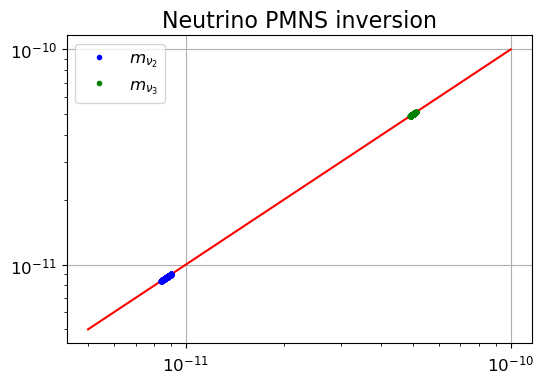

In [15]:
plt.figure(figsize=(6,4))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mn2,xd.mn2,'b.',label=r'$m_{\nu_2}$')
plt.loglog(xd.mn3,xd.mn3,'g.',label=r'$m_{\nu_3}$')

plt.title(r'Neutrino PMNS inversion',size=16)
plt.legend()

plt.grid()
#plt.savefig('plots/neutrino_masses.pdf')
plt.show()

## $\Delta$ N effetive

$N_{eff}=2.99\pm 0.17$
$N_{s}=3.046$

https://arxiv.org/pdf/1807.06209.pdf

PLack + BAO $\to \Delta N_{eff}\approx 0.3$
https://arxiv.org/pdf/1909.09574.pdf

In [12]:
3.046-(2.99+0.17)

-0.11400000000000032

In [11]:
from delta_N_efective import *

In [12]:
xd['DNeff'] = ΔNeff1_vec(2.3e-3, xd.epsilon, xd.TWpSPheno, xd.g1p)

In [13]:
xdNeff = xd[xd.DNeff < 0.3 ]

# Direct and indirec detection

In [14]:
from indirectdirect import *

In [15]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENONnTSI']
xe = np.loadtxt('fits/fit_XENONnT/fig4-230314729-SI.dat')
xdxe = pd.DataFrame(xe, columns=names1)

XENONnT=interpolate.interp1d(xdxe.MDM,xdxe.XENONnTSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('fits/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('fits/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('fits/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

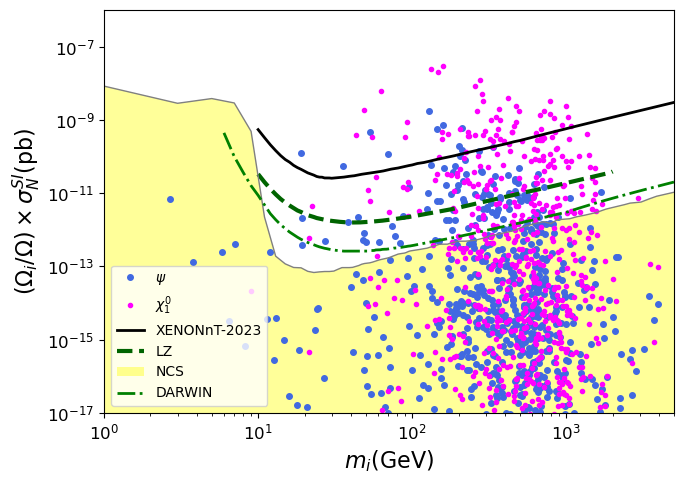

In [16]:
plt.figure(figsize=(7,5))

plt.loglog(xd.mChi, (xd.Omega1/Omega)*xd.SIN1, color='royalblue', marker='o',ms=4,linestyle='', label=r'$\psi$')
plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*xd.SIN2, color='magenta', marker='o',ms=3,linestyle='', label=r'$\chi^0_1$')

#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.4,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='green',linestyle='-.',lw=2,label='DARWIN')

plt.xlabel(r'$m_i$(GeV)',size=16)
plt.ylabel(r'$(\Omega_i/\Omega)\times\sigma_N^{SI}$(pb)',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.xlim(1e0,5e3)
plt.ylim(1e-17,1e-6)
#plt.ylim(1e-11,3.5e-9)
#plt.grid()

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

### Anality: Vector SI cross-section

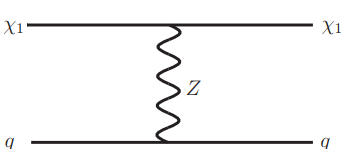

In [17]:
from IPython.display import Image
Image("vector-SI.png", width=250)

In [18]:
#Parameters
fN = 0.25
v = 246
vev = 246
#nucleon mass in GeV (proton and neutron mass)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

\begin{align}
\sigma^{SI}_{\chi N}= \dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{g_{eff}^4}{M_{Z'}^4}B^2
\end{align}

https://arxiv.org/pdf/1409.8165.pdf

In [19]:
xd['mrChi'] = MNn*xd.mChi/(MNn+xd.mChi)
xd['mrXi_1'] = MNn*xd.mXi_1/(MNn+xd.mXi_1)

xd['SIZp_Chi'] = (1./(4*np.pi))*xd.mrChi**2*((xd.g1p*np.cos(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.sin(xd.TWpSPheno)-xd.epsilon*gp*np.cos(xd.TWpSPheno)))**2/xd.MZp**4)*(-4+5)**2*GeVtomin2topb
xd['SIZp_Xi'] = (1./(4*np.pi))*xd.mrXi_1**2*((xd.g1p*np.cos(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.sin(xd.TWpSPheno)-xd.epsilon*gp*np.cos(xd.TWpSPheno)))**2/xd.MZp**4)*(10+1)**2*GeVtomin2topb

xd['SIZ_Chi'] = (1./(4*np.pi))*xd.mrChi**2*((xd.g1p*np.sin(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.cos(xd.TWpSPheno)+xd.epsilon*gp*np.sin(xd.TWpSPheno)))**2/MZ**4)*(-4+5)**2*GeVtomin2topb
xd['SIZ_Xi'] = (1./(4*np.pi))*xd.mrXi_1**2*((xd.g1p*np.sin(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.cos(xd.TWpSPheno)+xd.epsilon*gp*np.sin(xd.TWpSPheno)))**2/MZ**4)*(10+1)**2*GeVtomin2topb


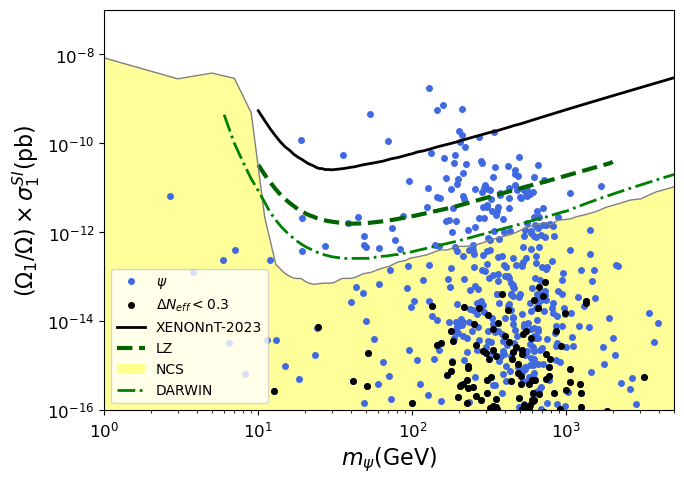

In [20]:
plt.figure(figsize=(7,5))

plt.loglog(xd.mChi, (xd.Omega1/Omega)*xd.SIN1, color='royalblue', marker='o',ms=4,linestyle='', label=r'$\psi$')
#plt.loglog(xd.mChi, xd.SIN1, color='red', marker='.',ms=4,linestyle='', label=r'$\psi$')
#plt.loglog(xd.mChi, (xd.Omega1/Omega)*(xd.SIZp_Chi+xd.SIZ_Chi), color='black', marker='.',ms=4,linestyle='', label=r'vector portal')

plt.loglog(xdNeff.mChi, (xdNeff.Omega1/Omega)*xdNeff.SIN1, color='black', marker='o',ms=4,linestyle='',\
           label=r'$\Delta N_{eff}<0.3$')


#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.4,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='green',linestyle='-.',lw=2,label='DARWIN')

plt.xlabel(r'$m_{\psi}$(GeV)',size=16)
plt.ylabel(r'$(\Omega_1/\Omega)\times\sigma_1^{SI}$(pb)',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.xlim(1e0,5e3)
plt.ylim(1e-16,1e-7)

plt.tight_layout()
#plt.savefig('plots/SI-xi.pdf')

In [22]:
BP = xd[np.logical_and(xd.mChi >100, xd.mChi <101.5)]
BP

,Unnamed: 0,Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,...,mChi,TWpSPheno,MZpSPheno,DNeff,mrChi,mrXi_1,SIZp_Chi,SIZp_Xi,SIZ_Chi,SIZ_Xi
656,35,0.258146,0.000936,0.000542,0.000384,3.536549,0.000081,0.227019,0.003704,0.121298,...,100.259536,0.000006,20.451076,0.242905,0.930837,0.938621,2.551765e-13,3.139496e-11,6.578012e-17,8.093080e-15


In [83]:
BP.to_csv('BP.csv')

In [85]:
BP.to_excel('BP.xlsx')

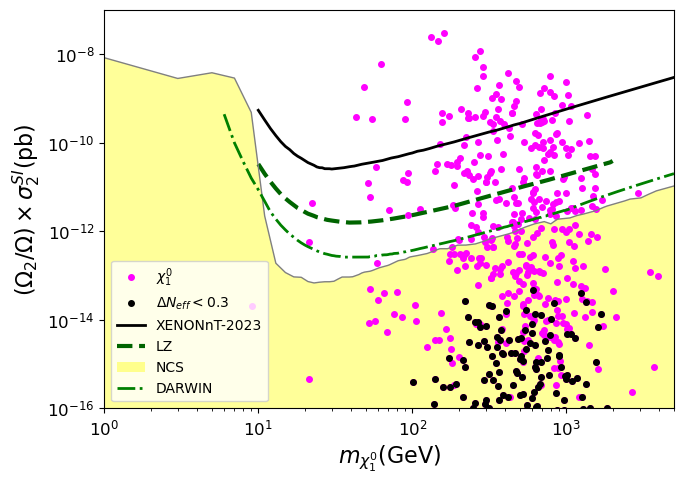

In [23]:
plt.figure(figsize=(7,5))

plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*xd.SIN2, color='magenta', marker='o',ms=4,linestyle='', label=r'$\chi^0_1$')
#plt.loglog(xd.mXi_1, xd.SIN2, color='red', marker='.',ms=4,linestyle='', label=r'$\chi^0_1$')

#plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*(xd.SIZp_Xi+xd.SIZ_Xi), color='black', marker='.',ms=4,linestyle='', label=r'vector portal')

plt.loglog(xdNeff.mXi_1, (xdNeff.Omega2/Omega)*xdNeff.SIN2, color='black', marker='o',ms=4,linestyle='',\
           label=r'$\Delta N_{eff}<0.3$')


#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.4,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='green',linestyle='-.',lw=2,label='DARWIN')

plt.xlabel(r'$m_{\chi_1^0}$(GeV)',size=16)
plt.ylabel(r'$(\Omega_2/\Omega)\times\sigma_2^{SI}$(pb)',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.xlim(1e0,5e3)
plt.ylim(1e-16,1e-7)

plt.tight_layout()
#plt.savefig('plots/SI-xi.pdf')
plt.show()

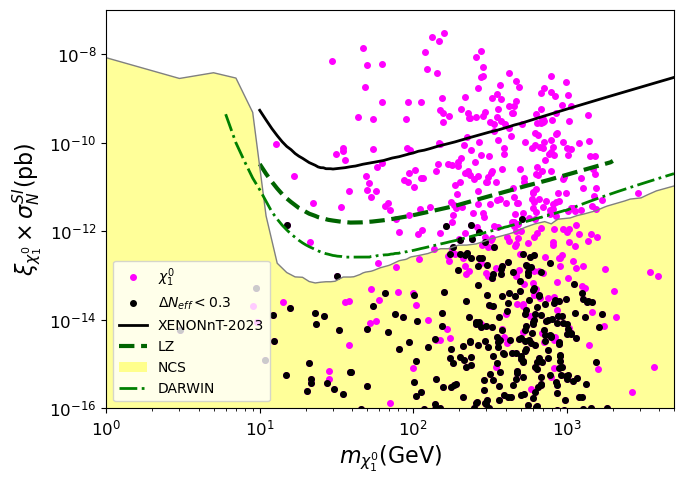

### Kinetic mixing plot

fix masses for mChi

In [15]:
def eplot(mDM,B,MZp):
    k = np.sqrt(XENONnT(mDM)*(1e+36/GeVtomin2topb)*4.*np.pi*((MNn+mDM)/(MNn*mDM))**2/(B*gp)**2*MZp**4)
    
    return(k)

In [16]:
eplot(500,1,1)

9.12149371677755e-09

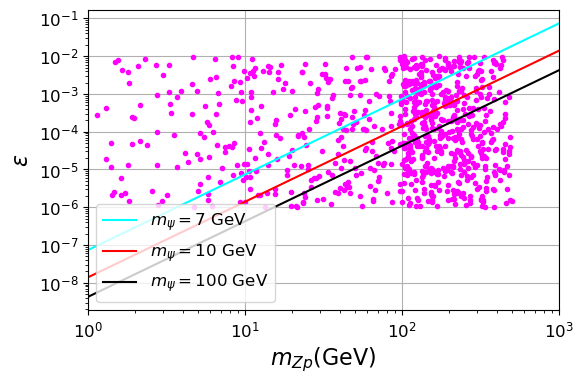

In [30]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp, xd.epsilon, color='magenta', marker='o',ms=3,linestyle='', label=r'')
#plt.loglog(xd.MZp, xd.epsilon*np.sqrt(xd.Omega1/Omega), color='black', marker='o',ms=3,linestyle='', label=r'')

n=np.arange(1,1e3,30)
plt.loglog(n, eplot(6.5,1,n), color='cyan', linestyle='-', label=r'$m_{\psi}=7$ GeV')
plt.loglog(n, eplot(10,1,n), color='red', linestyle='-', label=r'$m_{\psi}=10$ GeV')
plt.loglog(n, eplot(100,1,n), color='black', linestyle='-', label=r'$m_{\psi}=100$ GeV')


plt.xlabel(r'$m_{Zp}$(GeV)',size=16)
plt.ylabel(r'$\epsilon$',size=16)
plt.legend(prop={'size':12},loc='best')
plt.xlim(1,1e3)
#plt.ylim(1e-17,1e-6)
plt.grid()

plt.tight_layout()
#plt.savefig('plots/SI-xi.pdf')
plt.show()

### $\Delta$ N effetive

In [17]:
import numpy as py
from scipy.special import zeta
from scipy.optimize import bisect
from scipy import integrate as intg
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
%pylab inline
USETEX=False
if USETEX:
    matplotlib.rcParams['text.usetex'] = True
    #matplotlib.rcParams['text.latex.unicode'] = True

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [18]:
Tdec_νL = 0.0023
T, g = np.loadtxt('GT.dat',usecols=(0,1),unpack=True); T*=1e-3
geff = InterpolatedUnivariateSpline(T, g)
g_eff = lambda T: geff(T)

In [19]:
def H(T, G_N):
    return np.sqrt(4.0*np.pi**3*G_N*(g_eff(T)+21.0/4.0)/45.0)*T**2


In [20]:
def ΓνR(T,  epsilon, ThetaWp, gB):
    g1     = 3.55690247e-1
    g2     = 6.62798598e-1
    ThetaW = 4.9253522213664613e-1
    Mz     = 9.11887000e1
    gYB    = -g1*epsilon
    gBY    = 0.0
    gnuRZ  = 9.0*(-gB*np.sin(ThetaWp)+gYB*np.cos(ThetaWp)*np.sin(ThetaW))
    gdLZ   = 1.0/6.0*(3.0*g2*np.cos(ThetaW)*np.cos(ThetaWp)+g1*np.cos(ThetaWp)*np.sin(ThetaW)-gBY*np.sin(ThetaWp))
    gdRZ   = -1.0/3.0*(g1*np.cos(ThetaWp)*np.sin(ThetaW)-gBY*np.sin(ThetaWp))
    guLZ   = -1.0/6.0*(3.0*g2*np.cos(ThetaW)*np.cos(ThetaWp)-g1*np.cos(ThetaWp)*np.sin(ThetaW)+gBY*np.sin(ThetaWp))
    guRZ   = 2.0/3.0*(g1*np.cos(ThetaWp)*np.sin(ThetaWp)-gBY*np.sin(ThetaWp))  
    geLZ   = 1.0/2.0*(-g1*np.cos(ThetaWp)*np.sin(ThetaW)+g2*np.cos(ThetaWp)*np.cos(ThetaW)+gBY*np.sin(ThetaWp))
    geRZ   = -1.0*(g1*np.cos(ThetaWp)*np.sin(ThetaWp)-gBY*np.sin(ThetaWp))    
    gnuLZ  = -1.0/2.0*(g1*np.cos(ThetaWp)*np.sin(ThetaW)+g2*np.cos(ThetaWp)*np.cos(ThetaW)-gBY*np.sin(ThetaWp))
    Gamma  = (49/194400)*np.pi**5/zeta(3)*(1.0/Mz)**4.0*T**5.0*gnuRZ**2.0*3.0*(3.0*(gdLZ**2.0+gdRZ**2.0+guLZ**2.0+guRZ**2.0)+geLZ**2.0+geRZ**2.0+gnuLZ**2.0)
    return Gamma

In [21]:
def TdecνR(epsilon, ThetaWp, gB):
    G_N = 6.718624025799517e-39
    ΓH = lambda T, epsilon, ThetaWp, gB, G_N: ΓνR(T, epsilon, ThetaWp, gB)-H(T, G_N)
    return bisect(ΓH,T[0],T[-1], args=(epsilon, ThetaWp, gB, G_N))

In [22]:
TdecνR(1.0e-5, 1.0e-8, 0.15)

1.3883824982467157

In [31]:
def ΔNeff1(Tdec_νL,Tdec_νR):
    return 1.0*(g_eff(Tdec_νL)/g_eff(Tdec_νR))**(4/3)

In [32]:
ΔNeff1(2.3e-3,TdecνR(1.0e-5, 1.0e-8, 0.15))

0.07710118317015523

$N_{eff}=2.99\pm 0.17$
$N_{s}=3.046$

In [25]:
3.046-(2.99+0.17)

-0.11400000000000032

In [33]:
ΔNeff1(2.3e-3,TdecνR(xd.epsilon[2], xd.TWpSPheno[2], xd.g1p[2]))

0.06869704539420497

In [27]:
from delta_N_efective import *

In [34]:
ΔNeff1_vec(2.3e-3, xd.epsilon[2], xd.TWpSPheno[2], xd.g1p[2])

array(0.06869705)

In [29]:
for i in range(0,5):
    
    k = ΔNeff1(2.3e-3,TdecνR(xd.epsilon[i], xd.TWpSPheno[i], xd.g1p[i]))
    
    if k < 0.114:
        print('i=',i,k)

TypeError: ΔNeff1() missing 2 required positional arguments: 'ThetaWp' and 'gB'

## $\sigma v$ today

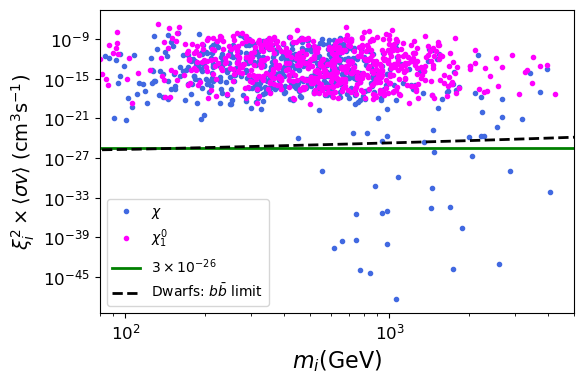

In [24]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi, (xd.Omega2/Omega)**2*xd.sv, color='royalblue', marker='o',ms=3,linestyle='',label='$\chi$')
plt.loglog(xd.mXi_1, (xd.Omega1/Omega)**2*xd.sv, color='magenta', marker='o',ms=3,linestyle='',label='$\chi_1^0$')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(10,1e4,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'g',lw=2,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=2,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_i$(GeV)',size=16)
plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=14)
plt.legend(prop={'size':10},loc='best')
plt.xlim(8e1,5e3)

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
plt.show()

### New Weinberg angle $\theta'_w$

Followint JHEP 07 (2018) 094

https://link.springer.com/article/10.1007/JHEP07(2018)094

\begin{align}
\tan(2\xi) = \dfrac{2\epsilon'\sin\theta_w}{1-\delta} + O(\epsilon^{'2})
\end{align}

where, $\delta=\dfrac{M_{Z'}^2}{M_Z^2}$

In [25]:
MZ = 91.1887

xd['delta']=(xd['MZp']/MZ)**2

sw2 = 0.22359779321117756

xd['TWp_analitic'] = np.arctan(2.*xd['epsilon']*np.sqrt(sw2)/(1.-xd['delta']))/2.

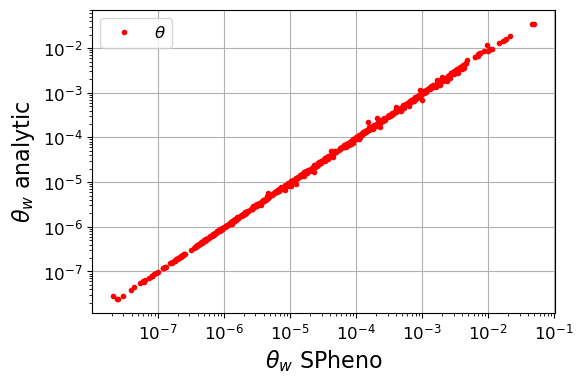

In [26]:
plt.figure(figsize=(6,4))

plt.loglog(np.abs(xd['TWpSPheno']), np.abs(xd['TWp_analitic']),'r.',label=r'$\theta$')

plt.xlabel(r'$\theta_w$ SPheno',size=16)
plt.ylabel(r'$\theta_w$ analytic',size=16)
plt.legend()
plt.grid()

plt.tight_layout()

### Anomaly magnetic muon momenta

$a_{\mu}=\dfrac{(g-2)\mu}{2}=116592040(54)\times 10^{-11}$ Fermilab

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


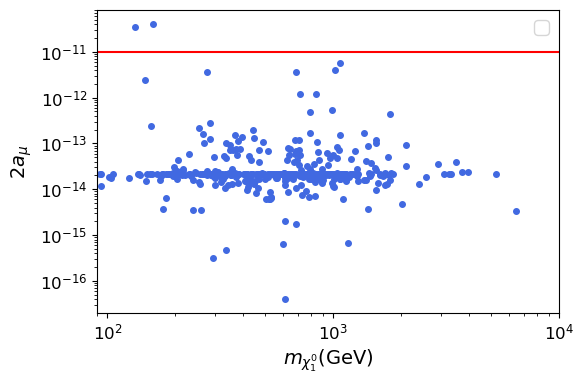

In [27]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, xd.g2mu, color='royalblue', marker='o',ms=4,linestyle='',label='')

plt.hlines(1e-11,1e-3,1e4,'r')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=14)
plt.ylabel(r'$2 a_{\mu}$',size=14)
plt.legend(prop={'size':14},loc='best')
plt.xlim(90,1e4)

plt.tight_layout()
#plt.savefig('plots/g2mu.pdf')
plt.show()

## Scan random parameters

In [28]:
xDM = xd

In [29]:
#Decouple spetrum
decouple = xDM[np.logical_and(xDM['mXi_1']-xDM['mChi']>3e2, xDM.Omega1 > Omega_min)]
#decouple = xDM[xDM.Omega1 > Omega_min]

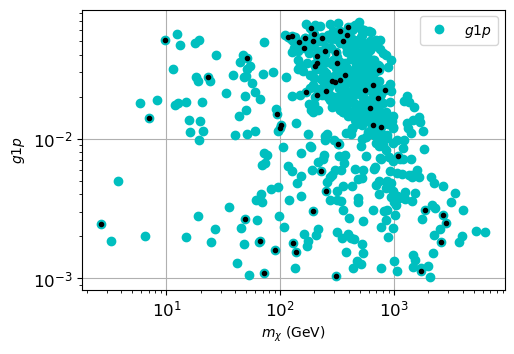

In [30]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.g1p,'co',label=r'$g1p$')
#plt.loglog(xDM['mXi_1'], xDM.g1p,'r.',label=r'$g1p$')
plt.loglog(decouple['mChi'], decouple.g1p,'k.',label=r'')

plt.ylabel(r'$g1p$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

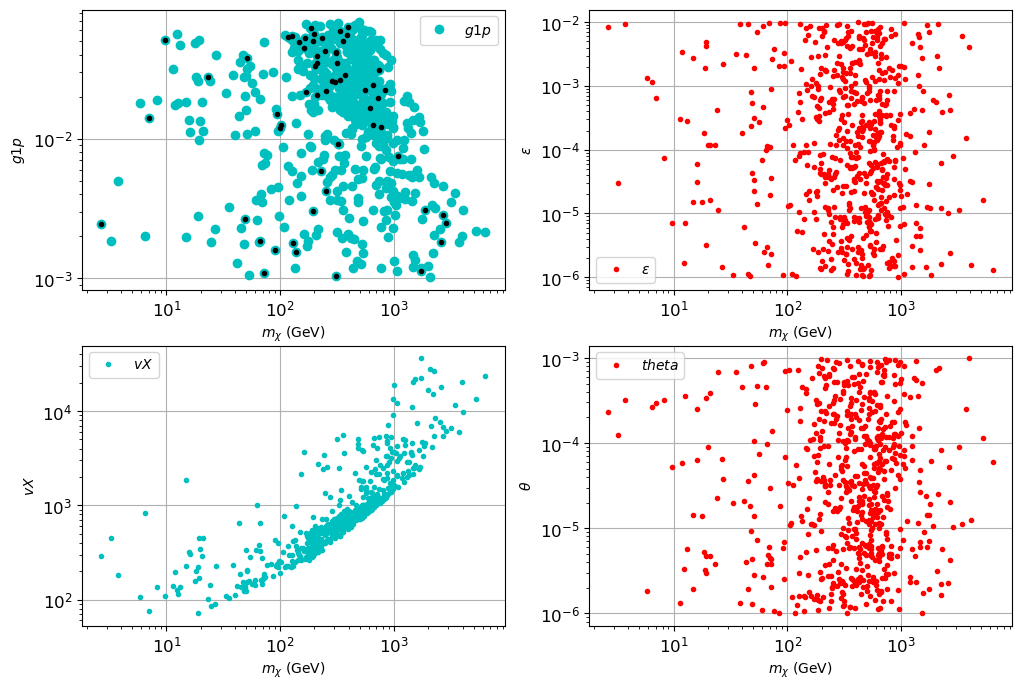

In [31]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.g1p,'co',label=r'$g1p$')
#plt.loglog(xDM['mXi_1'], xDM.g1p,'r.',label=r'$g1p$')
plt.loglog(decouple['mChi'], decouple.g1p,'k.',label=r'')

plt.ylabel(r'$g1p$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.epsilon,'r.',label=r'$\epsilon$')
plt.ylabel(r'$\epsilon$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.vX,'c.',label=r'$vX$')
plt.ylabel(r'$vX$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.theta,'r.',label=r'$theta$')
plt.ylabel(r'$\theta$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

$v_X$ low for low masses and $g_{B}$ big for los masses

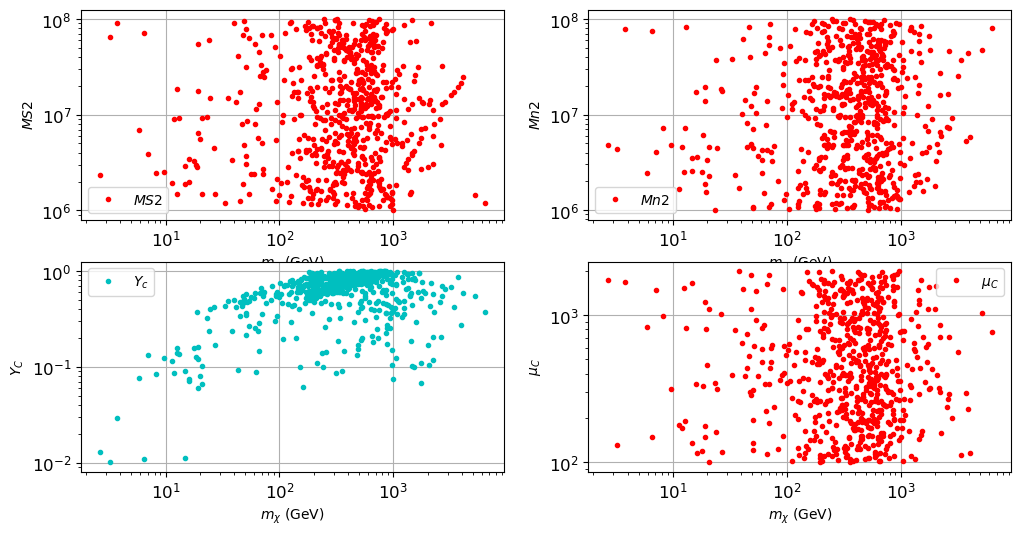

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.MS2,'r.',label=r'$MS2$')
plt.ylabel(r'$MS2$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Mn2,'r.',label=r'$Mn2$')
plt.ylabel(r'$Mn2$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Yc,'c.',label=r'$Y_c$')
plt.ylabel(r'$Y_C$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.muC,'r.',label=r'$\mu_C$')
plt.ylabel(r'$\mu_C$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

$Y_c$ big for low masses

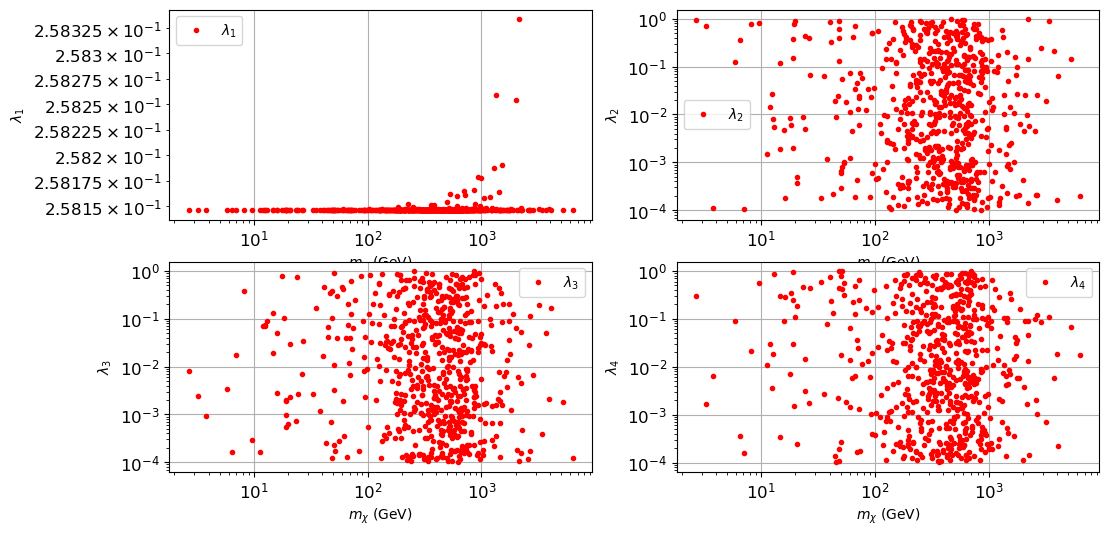

In [33]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.Lam1,'r.',label=r'$\lambda_1$')
plt.ylabel(r'$\lambda_1$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Lam2,'r.',label=r'$\lambda_2$')
plt.ylabel(r'$\lambda_2$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Lam3,'r.',label=r'$\lambda_3$')
plt.ylabel(r'$\lambda_3$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.Lam4,'r.',label=r'$\lambda_4$')
plt.ylabel(r'$\lambda_4$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

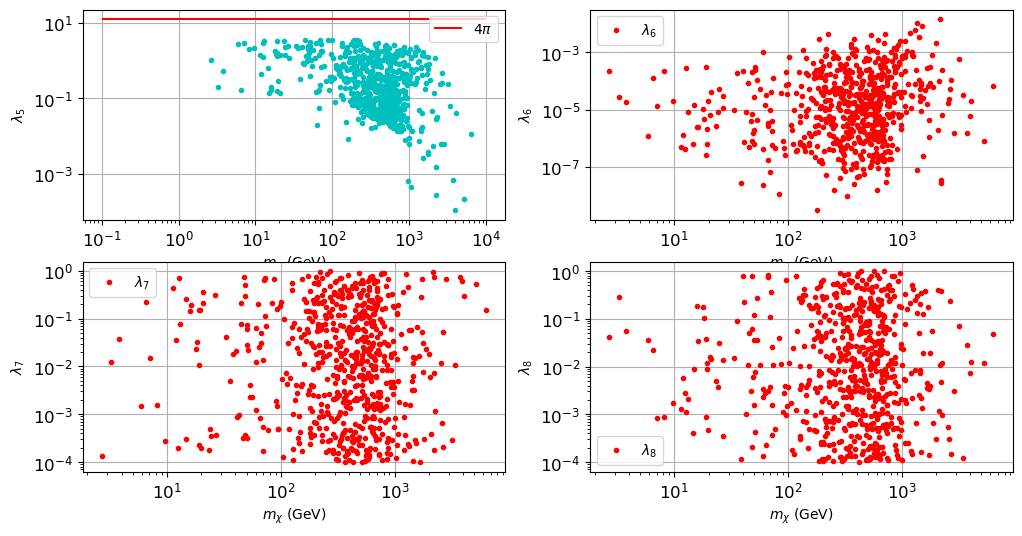

In [34]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.Lam5,'c.',label=r'')
#plt.loglog(xDM['mXi_1'], xDM.Lam5,'c.',label=r'')
plt.hlines(4*np.pi,0.1,1e4, 'r',label=r'$4\pi$')
plt.ylabel(r'$\lambda_5$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Lam6,'r.',label=r'$\lambda_6$')
plt.ylabel(r'$\lambda_6$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Lam7,'r.',label=r'$\lambda_7$')
plt.ylabel(r'$\lambda_7$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.Lam8,'r.',label=r'$\lambda_8$')
plt.ylabel(r'$\lambda_8$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

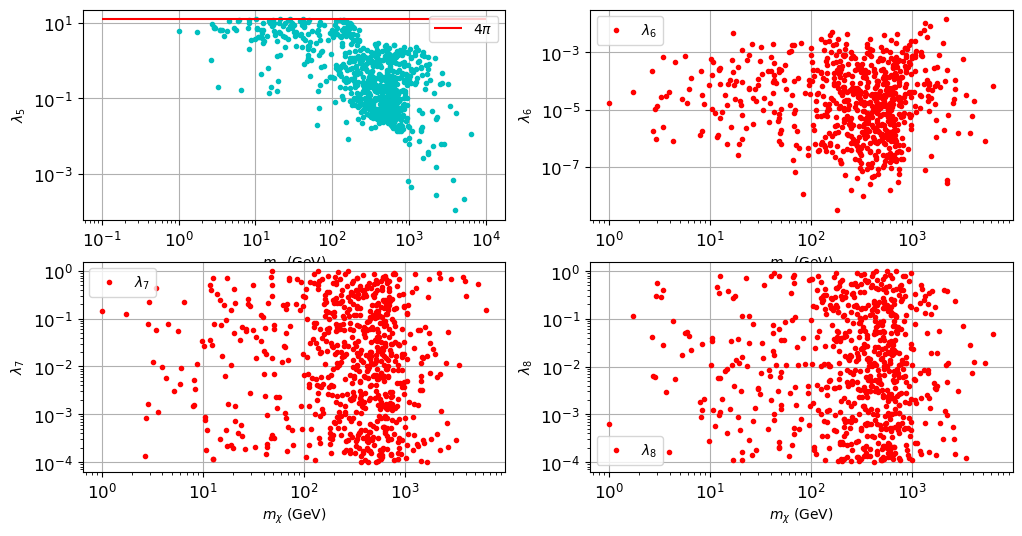

$\lambda_5$ no perturbative

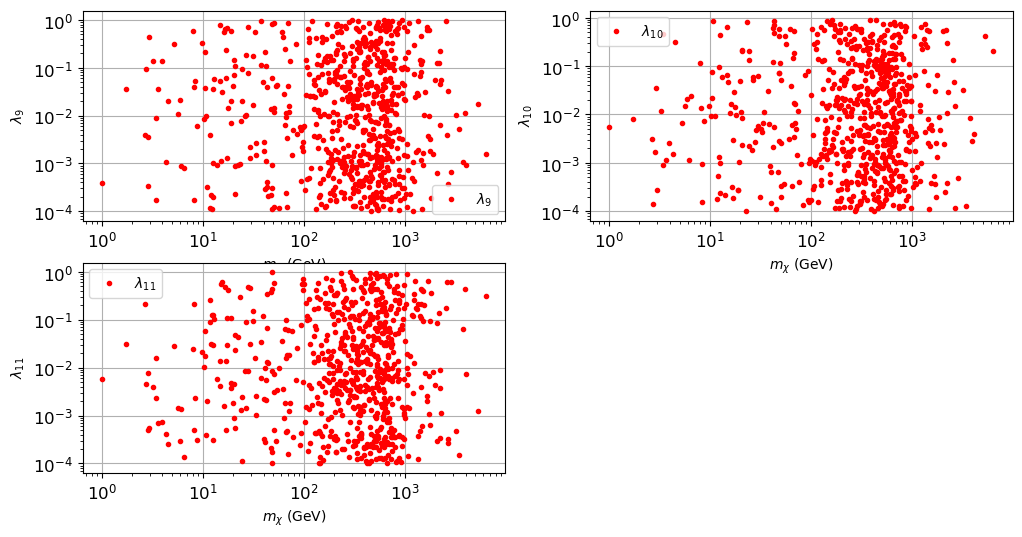

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.Lam9,'r.',label=r'$\lambda_9$')
plt.ylabel(r'$\lambda_9$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Lam10,'r.',label=r'$\lambda_{10}$')
plt.ylabel(r'$\lambda_{10}$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Lam11,'r.',label=r'$\lambda_{11}$')
plt.ylabel(r'$\lambda_{11}$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

### STU parameters

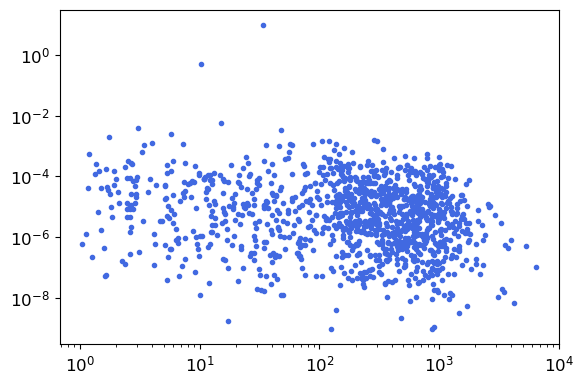

In [57]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, np.abs(xd['S']), color='royalblue', marker='o',ms=3,linestyle='',label='$\chi_1^0$')

#plt.xlabel(r'$m_i$(GeV)',size=18)
#plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=18)
#plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
plt.show()

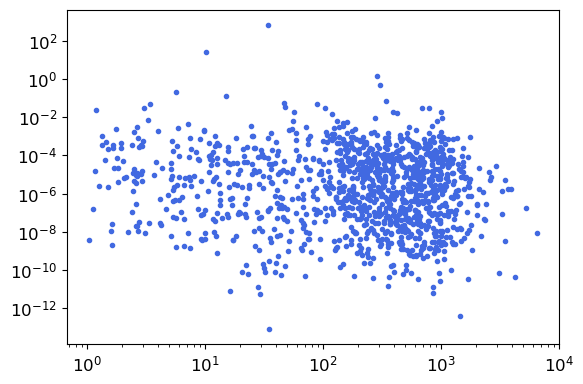

In [58]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, np.abs(xd['T']), color='royalblue', marker='o',ms=3,linestyle='',label='$\chi_1^0$')

#plt.xlabel(r'$m_i$(GeV)',size=18)
#plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=18)
#plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
plt.show()

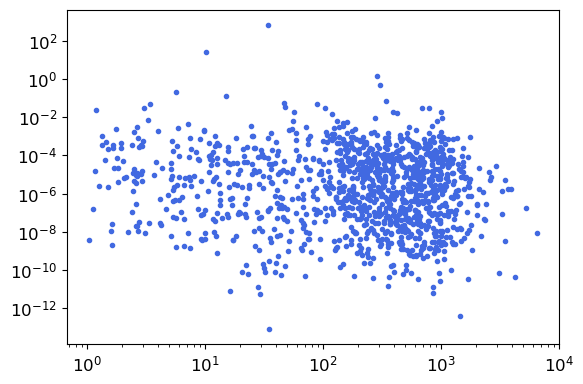

In [59]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, np.abs(xd['T']), color='royalblue', marker='o',ms=3,linestyle='',label='$\chi_1^0$')

#plt.xlabel(r'$m_i$(GeV)',size=18)
#plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=18)
#plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
plt.show()